## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [89]:
from sklearn import datasets, metrics, linear_model

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import os
os.environ['PATH'] = os.environ['PATH'] + (';D:\\pythonwork\\graphviz\\release\\bin\\')
import pydotplus

## Iris Datasets

#### Decision Tree

In [80]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state = 4)
clf = DecisionTreeClassifier(
        criterion = 'entropy',
        max_depth = None,
        min_samples_split = 2,
        min_samples_leaf = 1
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [45]:
acc1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acc1)

Accuracy: 0.9736842105263158


Accuracy: 0.9736842105263158


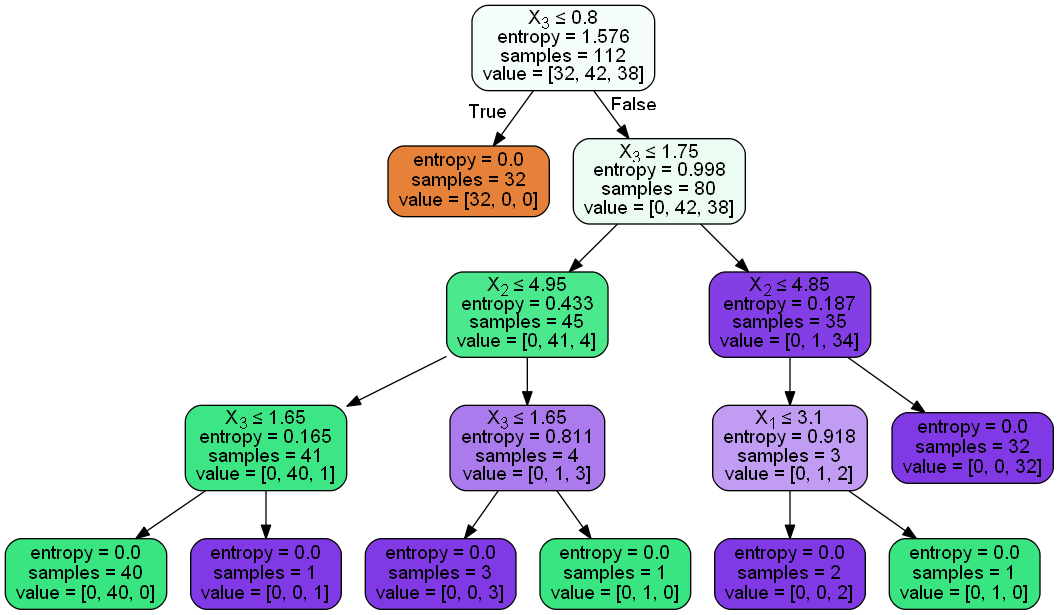

In [81]:
acc1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acc1)
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Logistic Regression

In [92]:
regr = linear_model.LogisticRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
acc2 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acc2)

Accuracy: 0.9210526315789473


## Boston Datasets

#### Decision Tree

In [86]:
boston = datasets.load_boston()
x1_train, x1_test, y1_train, y1_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state = 4)
clf = DecisionTreeRegressor(
        criterion = 'mse',
        max_depth = 5,
        min_samples_split = 50,
        min_samples_leaf = 1
)
clf.fit(x1_train, y1_train)
y1_pred = clf.predict(x1_test)

In [77]:
mse1 = metrics.mean_squared_error(y1_test, y1_pred)
print("MSE:",mse1)

MSE: 30.34220472440945


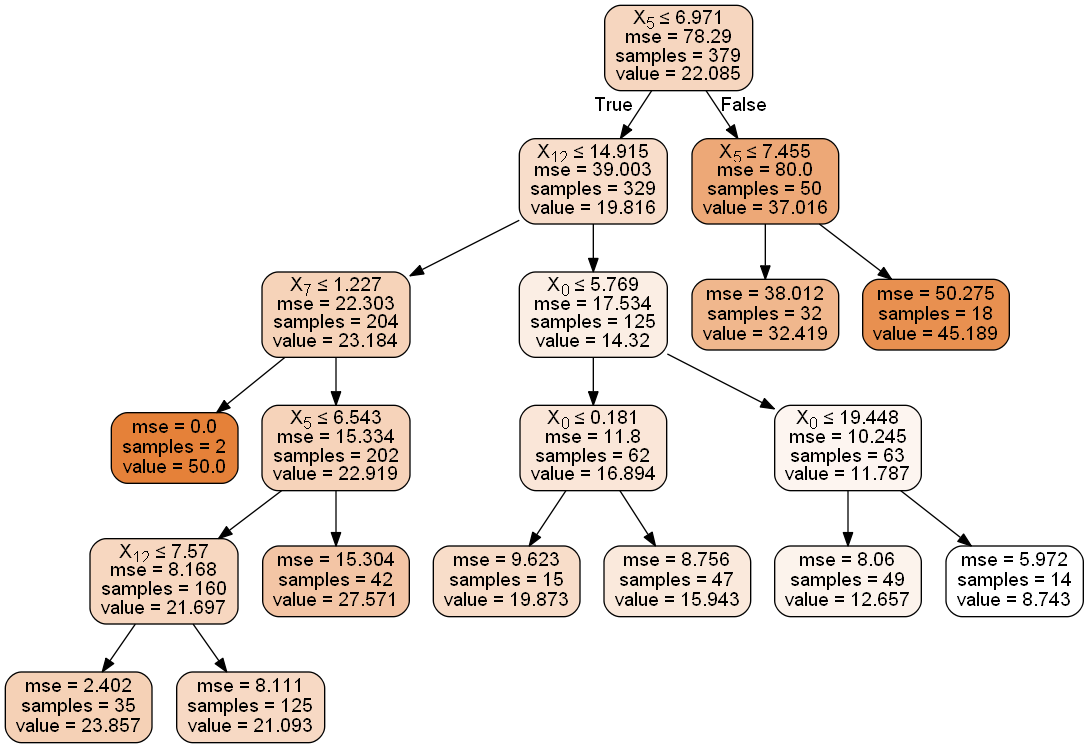

In [87]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### linear regression

In [90]:
regr = linear_model.LinearRegression()
regr.fit(x1_train, y1_train)
y1_pred = regr.predict(x1_test)
mse2 = metrics.mean_squared_error(y1_test, y1_pred)
print("MSE:",mse2)

MSE: 26.947085144448707
